In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/patrickgendotti/steam-achievementstatscom-rankings
df = pd.read_csv('datasets/steam_players.csv')#, index_col='Rank')
pd.options.display.min_rows = 14
df

G:\PROGRAMOWANIE\anaconda\program\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Rank,Player Id,Player Name,Best achievements,Points,#,Games,100%,All,Badges,XP,Member since,Hours,Last update
0,0,1,The Stranger,The Stranger,Blessing of the Flame Requiescat Memory Awak...,132759.30,153732,16755,4493,21203.0,4910,3087192,04/15/2011,75591.8,05/26/2022 11:41:05
1,1,2,lylat,lylat,"Death from Above Apex Predator Waste Not, Wa...",119588.95,141645,18358,6034,28377.0,195,296822,06/03/2009,55960.7,05/26/2022 11:42:01
2,2,3,hannez,hannez,Legendary Heckler Legendary Storm Legendary ...,96014.25,98255,13651,4008,23981.0,2009,792032,06/23/2010,33020.0,05/26/2022 11:40:54
3,3,4,DDtective,DDtective,Escaping Outlands A Duneman's Promise Elite ...,89515.41,101757,12070,3708,19821.0,196,60662,09/01/2005,9352.9,07/22/2022 23:39:26
4,4,5,Skaery,Skaery,World of Easy Goo World of Okay Goo World of...,88175.83,95676,10338,2127,13092.0,645,198956,06/08/2004,89602.9,05/26/2022 11:38:46
5,5,6,marklar,marklar,Private profile,83175.38,84083,11711,3949,0.0,1212,378057,NaN,57020.6,07/12/2022 20:24:53
6,6,7,AFAK,AFAK,Research and Development 4 A Perfect World - ...,77283.09,86238,17436,3938,29105.0,472,169257,09/19/2014,30038.4,08/08/2022 08:17:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200003,199973,200004,76561198073941683,Jesse Mccree,['Dead men tell no lies (Blockstorm – 2.42 poi...,467.62,800,146,2,NaN,8,1535,10/21/2012,2749.3,08/08/2022 01:32:14
200004,199974,200005,76561199008238387,Bugs Max,['Oh baby your breath smells (Traffic Jams – 2...,467.61,747,154,2,202.0,20,3341,12/06/2019,449.7,05/27/2022 21:03:32


# Cleaning data

In [3]:
def clean_data(df):
    return (df
            .rename(columns={'Points':'points', 'Best achievements':'best_achiev', 'Games':'games_owned', 'Player Name':'player_name', 'Hours':'hours_played', '100%':'full_achiev_games'})
            .assign(all_achiev=df['All'].fillna(method='bfill'),
                    date_joined=df['Member since'].astype('datetime64'), #pd.to_datetime(df['Member since']),
                    last_update=df['Last update'].str.split(' ').str[0].astype('datetime64'),
                    hours_daily=lambda df: (df.hours_played / (df.last_update - df.date_joined).dt.days).round(2)
                   )
            .drop(columns=['Unnamed: 0', 'Player Id', '#', 'XP', 'XP', 'All', 'Badges', 'Member since', 'Last update']
                 )
           )


def mod_data(df):
    return (df.mask(df['hours_daily'] > 24, 24).reset_index(drop=True)
            #.drop(df[df.points == 24].index).reset_index(drop=True)
            #.drop(df[df.full_achiev_games > df.games_owned].index).reset_index(drop=True)
            #.drop(df[df.best_achiev == "['Private profile']"].index).reset_index(drop=True)
            #.drop(df[df.date_joined.isnull()].index).rest_index(drop=True)
           )
           

df1 = mod_data(clean_data(df))
df1

,Rank,player_name,best_achiev,points,games_owned,full_achiev_games,hours_played,all_achiev,date_joined,last_update,hours_daily
0,1,The Stranger,Blessing of the Flame Requiescat Memory Awak...,132759.30,16755,4493,75591.8,21203.0,2011-04-15 00:00:00,2022-05-26 00:00:00,18.62
1,2,lylat,"Death from Above Apex Predator Waste Not, Wa...",119588.95,18358,6034,55960.7,28377.0,2009-06-03 00:00:00,2022-05-26 00:00:00,11.81
2,3,hannez,Legendary Heckler Legendary Storm Legendary ...,96014.25,13651,4008,33020.0,23981.0,2010-06-23 00:00:00,2022-05-26 00:00:00,7.58
3,4,DDtective,Escaping Outlands A Duneman's Promise Elite ...,89515.41,12070,3708,9352.9,19821.0,2005-09-01 00:00:00,2022-07-22 00:00:00,1.52
4,5,Skaery,World of Easy Goo World of Okay Goo World of...,88175.83,10338,2127,89602.9,13092.0,2004-06-08 00:00:00,2022-05-26 00:00:00,13.66
5,6,marklar,Private profile,83175.38,11711,3949,57020.6,0.0,NaT,2022-07-12 00:00:00,NaN
6,7,AFAK,Research and Development 4 A Perfect World - ...,77283.09,17436,3938,30038.4,29105.0,2014-09-19 00:00:00,2022-08-08 00:00:00,10.43
...,...,...,...,...,...,...,...,...,...,...,...
200003,200004,Jesse Mccree,['Dead men tell no lies (Blockstorm – 2.42 poi...,467.62,146,2,2749.3,202.0,2012-10-21 00:00:00,2022-08-08 00:00:00,0.77
200004,200005,Bugs Max,['Oh baby your breath smells (Traffic Jams – 2...,467.61,154,2,449.7,202.0,2019-12-06 00:00:00,2022-05-27 00:00:00,0.50


In [4]:
df1 = df1.drop(df1[df1.points == 24].index)
df1 = df1.drop(df1[df1.full_achiev_games > df1.games_owned].index)
df1 = df1.drop(df1[df1.best_achiev == "['Private profile']"].index)
df1 = df1.drop(df1[df1.date_joined.isnull()].index)
    
df1.isnull().sum()
df1[['date_joined','last_update']] = df1[['date_joined','last_update']].apply(pd.to_datetime, format='%Y-%m-%d')
df1.reset_index(drop=True)

,Rank,player_name,best_achiev,points,games_owned,full_achiev_games,hours_played,all_achiev,date_joined,last_update,hours_daily
0,1,The Stranger,Blessing of the Flame Requiescat Memory Awak...,132759.30,16755,4493,75591.8,21203.0,2011-04-15,2022-05-26,18.62
1,2,lylat,"Death from Above Apex Predator Waste Not, Wa...",119588.95,18358,6034,55960.7,28377.0,2009-06-03,2022-05-26,11.81
2,3,hannez,Legendary Heckler Legendary Storm Legendary ...,96014.25,13651,4008,33020.0,23981.0,2010-06-23,2022-05-26,7.58
3,4,DDtective,Escaping Outlands A Duneman's Promise Elite ...,89515.41,12070,3708,9352.9,19821.0,2005-09-01,2022-07-22,1.52
4,5,Skaery,World of Easy Goo World of Okay Goo World of...,88175.83,10338,2127,89602.9,13092.0,2004-06-08,2022-05-26,13.66
5,7,AFAK,Research and Development 4 A Perfect World - ...,77283.09,17436,3938,30038.4,29105.0,2014-09-19,2022-08-08,10.43
6,8,Gajusz,Plague Doctor Challenge 65 Complete! Challen...,63438.65,4134,1108,44010.9,5299.0,2009-08-19,2022-05-27,9.44
...,...,...,...,...,...,...,...,...,...,...,...
191875,200004,Jesse Mccree,['Dead men tell no lies (Blockstorm – 2.42 poi...,467.62,146,2,2749.3,202.0,2012-10-21,2022-08-08,0.77
191876,200005,Bugs Max,['Oh baby your breath smells (Traffic Jams – 2...,467.61,154,2,449.7,202.0,2019-12-06,2022-05-27,0.50


In [5]:
df1[df1['best_achiev'].str.contains('Private', na=False)]
df1.dtypes

Rank                          int64
player_name                  object
best_achiev                  object
points                      float64
games_owned                   int64
full_achiev_games             int64
hours_played                float64
all_achiev                  float64
date_joined          datetime64[ns]
last_update          datetime64[ns]
hours_daily                 float64
dtype: object

In [6]:
df1.best_achiev.value_counts().head(5)
df1['best_achiev_game'] = df1.best_achiev.str.extract(r'((?<=\().*?(?=\ –))')
df1.best_achiev_game.value_counts().reset_index()

,index,best_achiev_game
0,PAYDAY 2,3205
1,Guns of Icarus Online,2813
2,Rising Storm/Red Orchestra 2 Multiplayer,2724
3,Company of Heroes 2,2019
4,Left 4 Dead 2,1836
5,SMITE,1816
6,Total War: SHOGUN 2,1204
...,...,...
8401,Crab Cakes Rescue,1
8402,Are You Smarter Than a 5th Grader,1


In [7]:
(df1.loc[(df1['best_achiev_game'] == 'PAYDAY 2') & (df1['hours_daily'] > 5), ['hours_daily', 'last_update']])

,hours_daily,last_update
57,6.03,2022-05-28
64,10.10,2022-02-24
977,6.90,2022-05-31
1337,5.39,2021-12-20
2165,6.18,2022-01-19
2317,12.14,2022-08-28
2981,5.11,2022-06-19
...,...,...
130750,6.16,2022-08-17
134333,9.03,2020-03-27


# Exploratory data analysis

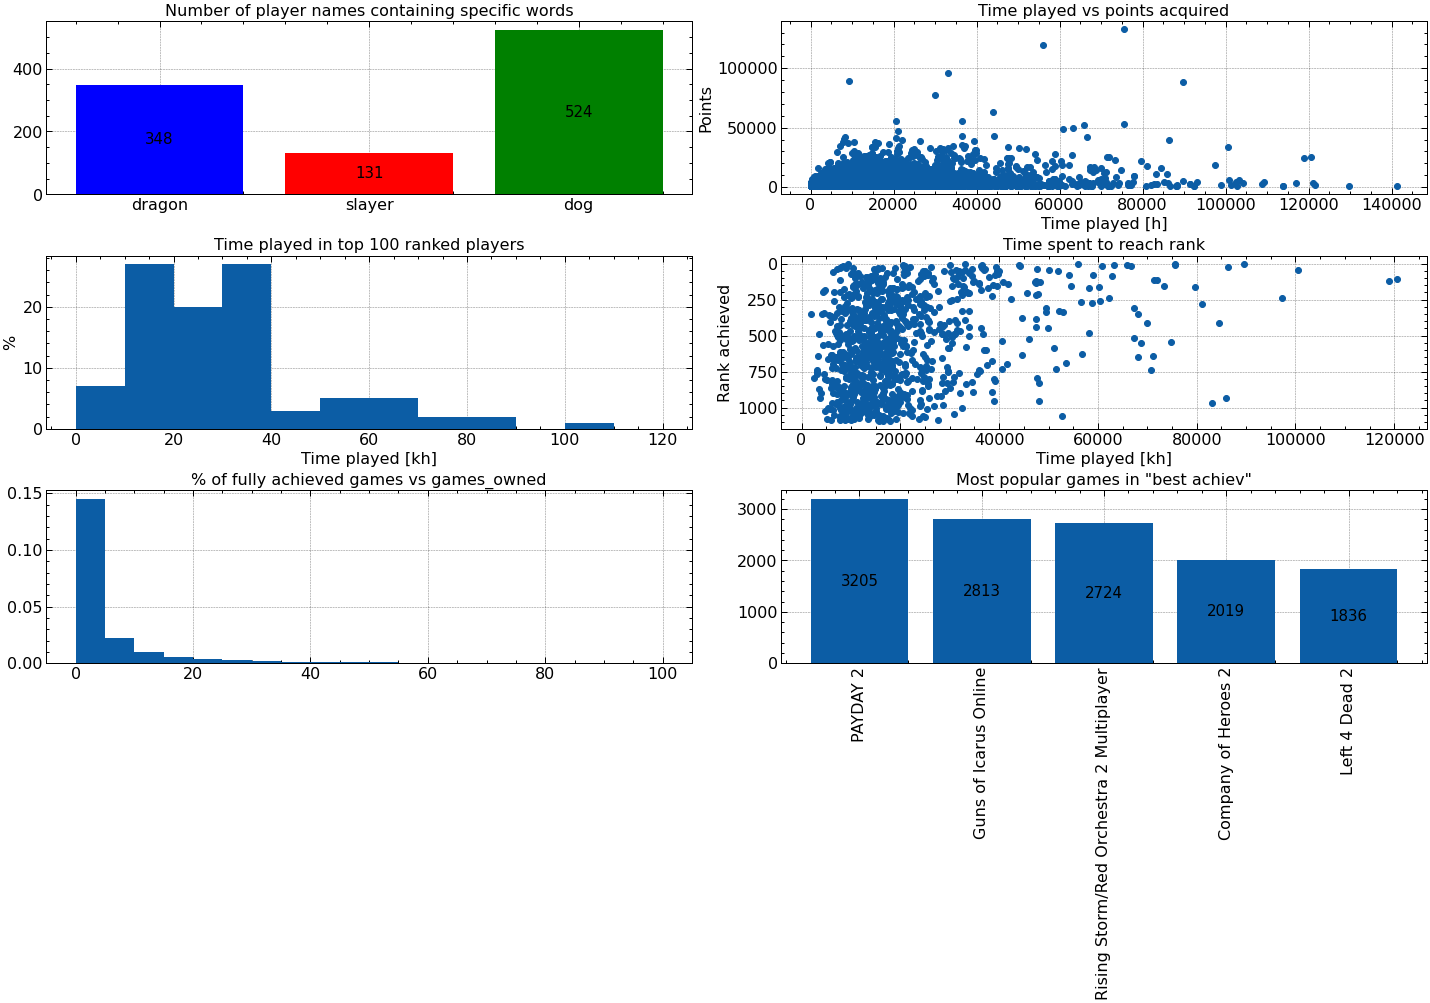

In [17]:
plt.style.use(['science' , 'notebook', 'grid'])
fig, axes = plt.subplots(3, 2, figsize=(20,14))

ax = axes[0][0]
x1 = df1[df1['player_name'].str.lower().str.contains('dragon', na=False)].count()[0]
x2 = df1[df1['player_name'].str.lower().str.contains('slayer', na=False)].count()[0]
x3 = df1[df1['player_name'].str.lower().str.contains('dog', na=False)].count()[0]
ax.bar(['dragon', 'slayer', 'dog'], [x1, x2, x3], color=['b', 'r', 'g'])
ax.set_title('Number of player names containing specific words')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=15)

ax = axes[0][1]
ax.scatter(df1.query('hours_played != 0 & points != 0').hours_played, df1.query('hours_played != 0 & points != 0').points)
ax.set_xlabel('Time played [h]')
ax.set_ylabel('Points')
ax.set_title('Time played vs points acquired')

ax = axes[1][0]
ax.hist(df1.query('hours_played != 0').head(100).hours_played / 1000, bins=np.linspace(0, 120, 13), density=False)
ax.set_xlabel('Time played [kh]')
ax.set_ylabel('%')
ax.set_title('Time played in top 100 ranked players')

ax = axes[1][1]
ax.scatter(df1.query('hours_played != 0 & points != 0').hours_played.head(1000), df1.query('hours_played != 0 & points != 0').Rank.head(1000))
ax.invert_yaxis()
ax.set_xlabel('Time played [kh]')
ax.set_ylabel('Rank achieved')
ax.set_title('Time spent to reach rank')

ax = axes[2][0]
ax.hist(df1.full_achiev_games / df1.games_owned * 100, bins=20, density=True)
ax.set_title('% of fully achieved games vs games_owned')

ax = axes[2][1]
ax.bar(df1.best_achiev_game.value_counts().reset_index()['index'].head(5), df1.best_achiev_game.value_counts().head(5))
ax.set_title('Most popular games in "best achiev"')
plt.xticks(rotation='vertical')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=15)

fig.tight_layout(pad=0.6)
plt.show()